# Visualizing Errors
For any scientific measurement, accurate accounting for errors is nearly as important,
if not more important, than accurate reporting of the number itself.

## Basic Errorbars
A basic errorbar can be created with a single Matplotlib function call

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

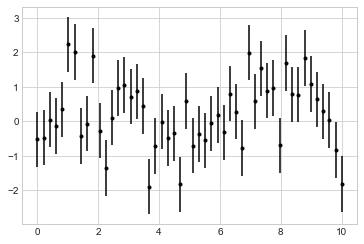

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the <b>fmt</b> is a format code controlling the appearance of lines and points, and has
the same syntax as the shorthand used in plt.plot,

In addition to these basic options, the<b> errorbar</b> function has many options to finetune
the outputs. Using these additional options you can easily customize the aesthetics
of your errorbar plot. I often find it helpful, especially in crowded plots, to make
the errorbars lighter than the points themselves

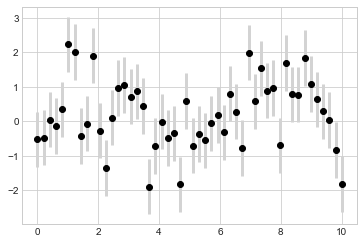

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors
In some situations it is desirable to show errorbars on continuous quantities. Though
Matplotlib does not have a built-in convenience routine for this type of application,
it’s relatively easy to combine primitives like<b> plt.plot</b> and<b> plt.fill_between</b> for a
useful result.

Here we’ll perform a simple<b> Gaussian process regression (GPR)</b>, using the<b> Scikit-Learn</b>
API. This is a method of fitting
a very flexible nonparametric function to data with a continuous measure of the
uncertainty. We won’t delve into the details of Gaussian process regression at this
point, but will focus instead on how you might visualize such a continuous error
measurement:

In [5]:
from sklearn.gaussian_process import GaussianProcess
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (C:\Users\RodgersNyangweso\Anaconda3\lib\site-packages\sklearn\gaussian_process\__init__.py)

We now have <b>xfit</b>,<b> yfit</b>, and<b> dyfit</b>, which sample the continuous fit to our data. We
could pass these to the <b>plt.errorbar</b> function as above, but we don’t really want to
plot 1,000 points with 1,000 errorbars. Instead, we can use the<b> plt.fill_between</b>
function with a light color to visualize this continuous error

In [6]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

NameError: name 'xdata' is not defined

Note what we’ve done here with the fill_between function: we pass an x value, then
the lower y-bound, then the upper y-bound, and the result is that the area between
these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression
algorithm is doing: in regions near a measured data point, the model is strongly
constrained and this is reflected in the small model errors. In regions far from a
measured data point, the model is not strongly constrained, and the model errors
increase.